In [1]:
import os

def load_casia_b_data(dataset_path):
    """
    Load CASIA-B silhoutte data and split into training and testing lists:
      - Training: Subjects 001–074
      - Testing:  Subject 075–124

    Returns:
      train_data: List of dicts for each training sequence
      test_data:  List of dicts for each testing sequence
    """
    # Define subjects
    train_subjects = [f"{i:03d}" for i in range(1, 75)]
    test_subjects  = [f"{i:03d}" for i in range(75, 125)]

    # Define conditions and sequences
    conditions = {
        'nm': [f"nm-{j:02d}" for j in range(1, 7)],
        'bg': ['bg-01', 'bg-02'],
        'cl': ['cl-01', 'cl-02']
    }

    # All 11 views: 0°,18°,…,162°,180° (padded to three digits)
    views = ["090"]

    def gather_entries(subject_list):
        entries = []
        for subject in subject_list:
            subj_path = os.path.join(dataset_path, subject)
            if not os.path.isdir(subj_path):
                continue
            for cond, seqs in conditions.items():
                for seq in seqs:
                    seq_path = os.path.join(subj_path, seq)
                    if not os.path.isdir(seq_path):
                        continue
                    for view in views:
                        view_path = os.path.join(seq_path, view)
                        if not os.path.isdir(view_path):
                            continue
                        # Count silhouette frames (.png)
                        frames = [f for f in os.listdir(view_path) if f.endswith('.png')]
                        if frames:
                            entries.append({
                                'subject':   subject,
                                'condition': cond,
                                'sequence':  seq,
                                'view':      view,
                                'path':      view_path,
                                'num_frames': len(frames)
                            })
        return entries

    train_data = gather_entries(train_subjects)
    test_data  = gather_entries(test_subjects)

    print(f"Loaded {len(train_data)} training sequences from {len(train_subjects)} subjects")
    print(f"Loaded {len(test_data)} testing sequences from {len(test_subjects)} subjects")
    return train_data, test_data

# Example usage:
data_root = r"D:\vit study\Machine Learning\Gait\CASIA - B\CASIA - B\GaitDatasetB-silh\GaitDatasetB-silh\GaitDatasetB-silh"
train_data, test_data = load_casia_b_data(data_root)


Loaded 730 training sequences from 74 subjects
Loaded 500 testing sequences from 50 subjects


In [2]:
import os
import pandas as pd

def load_casia_b_090_df(dataset_path):
    train_subjects = [f"{i:03d}" for i in range(1,75)]
    test_subjects  = [f"{i:03d}" for i in range(75,125)]
    conditions = {
        'nm': [f"nm-{j:02d}" for j in range(1,7)],
        'bg': ['bg-01','bg-02'],
        'cl': ['cl-01','cl-02']
    }
    view = '090'
    def gather(subjects):
        rows = []
        for subj in subjects:
            for cond, seqs in conditions.items():
                for seq in seqs:
                    path = os.path.join(dataset_path, subj, seq, view)
                    if os.path.isdir(path):
                        frames = [f for f in os.listdir(path) if f.endswith('.png')]
                        if frames:
                            rows.append({'subject':subj,'condition':cond,'path':path,'sequence':seq,'view':view,'num_frames':len(frames)})
        return pd.DataFrame(rows)

    train_df = gather(train_subjects)
    test_df  = gather(test_subjects)
    print(f"Train: {len(train_df)} sequences, Test: {len(test_df)} sequences")
    return train_df, test_df

# Point to your CASIA-B silhouette folder
data_root = r"D:\vit study\Machine Learning\Gait\CASIA - B\CASIA - B\GaitDatasetB-silh\GaitDatasetB-silh\GaitDatasetB-silh"
train_df, test_df = load_casia_b_090_df(data_root)


Train: 730 sequences, Test: 500 sequences


In [3]:
counts = pd.DataFrame({
    'Training': train_df['condition'].value_counts(),
    'Testing':  test_df['condition'].value_counts()
}).fillna(0).astype(int)
print(counts)


           Training  Testing
condition                   
nm              438      300
bg              146      100
cl              146      100


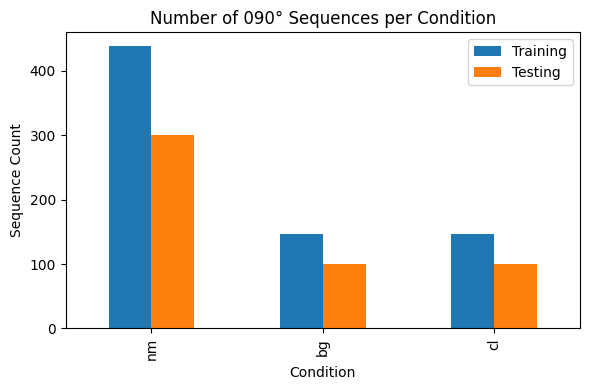

In [4]:
import matplotlib.pyplot as plt

counts.plot(kind='bar', figsize=(6,4))
plt.title('Number of 090° Sequences per Condition')
plt.xlabel('Condition')
plt.ylabel('Sequence Count')
plt.tight_layout()
plt.show()


In [5]:
train_data[0]

{'subject': '001',
 'condition': 'nm',
 'sequence': 'nm-01',
 'view': '090',
 'path': 'D:\\vit study\\Machine Learning\\Gait\\CASIA - B\\CASIA - B\\GaitDatasetB-silh\\GaitDatasetB-silh\\GaitDatasetB-silh\\001\\nm-01\\090',
 'num_frames': 56}

In [6]:
classes=train_df["subject"].unique()
classes

array(['001', '002', '003', '004', '006', '007', '008', '009', '010',
       '011', '012', '013', '014', '015', '016', '017', '018', '019',
       '020', '021', '022', '023', '024', '025', '026', '027', '028',
       '029', '030', '031', '032', '033', '034', '035', '036', '037',
       '038', '039', '040', '041', '042', '043', '044', '045', '046',
       '047', '048', '049', '050', '051', '052', '053', '054', '055',
       '056', '057', '058', '059', '060', '061', '062', '063', '064',
       '065', '066', '067', '068', '069', '070', '071', '072', '073',
       '074'], dtype=object)

In [7]:
train_df["sequence"].unique()


array(['nm-01', 'nm-02', 'nm-03', 'nm-04', 'nm-05', 'nm-06', 'bg-01',
       'bg-02', 'cl-01', 'cl-02'], dtype=object)

In [8]:
lengths = [len(os.listdir(ent['path'])) for ent in train_data]
print(min(lengths), max(lengths))


42 86


In [9]:
# List entries with zero frames
empty_train = [e for e in train_data if e['num_frames'] <= 40]
empty_test  = [e for e in test_data  if e['num_frames'] <= 40]

print(f"Empty training sequences: {len(empty_train)}")
for e in empty_train:
    print(f"Subject {e['subject']}, Condition {e['condition']}, Sequence {e['sequence']}, View {e['view']}")

print(f"\nEmpty testing sequences: {len(empty_test)}")
for e in empty_test:
    print(f"Subject {e['subject']}, Condition {e['condition']}, Sequence {e['sequence']}, View {e['view']}")


Empty training sequences: 0

Empty testing sequences: 0


In [10]:
MIN_SEQ_LEN = 40

# Filter training data
filtered_train = []
for e in train_data:
    if e['num_frames'] >= MIN_SEQ_LEN:
        filtered_train.append(e)

# Filter testing data
filtered_test = []
for e in test_data:
    if e['num_frames'] >= MIN_SEQ_LEN:
        filtered_test.append(e)

# Update the original lists
train_data = filtered_train
test_data = filtered_test

print(f"Training sequences after filtering: {len(train_data)}")
print(f"Testing sequences after filtering: {len(test_data)}")


Training sequences after filtering: 730
Testing sequences after filtering: 500


41
Subject: 006, Condition: nm, Sequence: nm-02, View: 090, Number of frames: 43


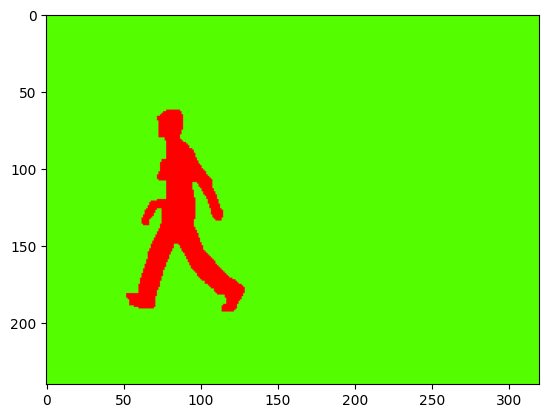

In [11]:
import matplotlib.pyplot as plt
import os
import math
import random

rand_num = random.choice(range(len(train_data)))
print(rand_num)
sample=train_data[rand_num]
sample_path=sample["path"]
sample_frames=os.listdir(sample_path)
image=plt.imread(os.path.join(sample_path,random.choice(sample_frames)))
print(f"Subject: {sample['subject']}, Condition: {sample['condition']}, Sequence: {sample['sequence']}, View: {sample['view']}, Number of frames: {sample['num_frames']}")  
plt.imshow(image, cmap='prism_r')


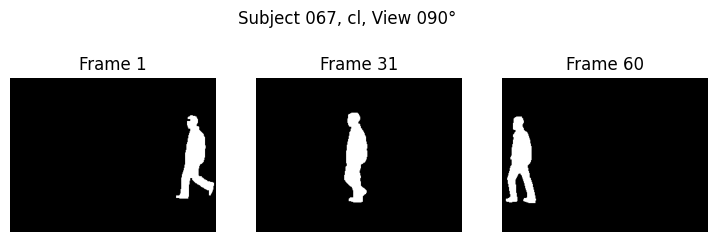

In [12]:
import matplotlib.pyplot as plt
import os

# Pick the first training sequence
rand_num = random.choice(range(len(train_data)))
sample = train_data[rand_num]
frame_files = sorted(f for f in os.listdir(sample['path']) if f.endswith('.png'))

# Select three frames evenly spaced through the sequence
indices = [0, len(frame_files)//2, len(frame_files)-1]
selected = [frame_files[i] for i in indices]

# Load and plot
plt.figure(figsize=(9, 3))
for i, fname in enumerate(selected):
    img = plt.imread(os.path.join(sample['path'], fname))
    plt.subplot(1, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Frame {indices[i]+1}")
plt.suptitle(f"Subject {sample['subject']}, {sample['condition']}, View {sample['view']}°")
plt.show()


In [13]:
import tensorflow as tf

IMG_HEIGHT = 120
IMG_WIDTH  = 90

def preprocess_frame(image_path):
    """
    Reads an image file, decodes, resizes, and normalizes it.
    """
    # Read & decode
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=1)            # grayscale
    # Resize
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    # Normalize to [0,1]
    image = image / 255.0
    return image


In [14]:
preprocess_frame(os.path.join(sample_path, sample_frames[0]))

<tf.Tensor: shape=(120, 90, 1), dtype=float32, numpy=
array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], shape=(120, 90, 1), dtype=float32)>

In [15]:
import os
import numpy as np
import tensorflow as tf

IMG_HEIGHT = 120
IMG_WIDTH  = 90
SEQ_LEN    = 40

def preprocess_frame(path):
    # Read & decode
    image = tf.io.read_file(path)
    image = tf.image.decode_png(image, channels=1)
    # Resize & normalize
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image = image / 255.0
    return image.numpy()  # convert to NumPy

def build_dataset(entries):
    X_list = []
    y_list = []

    for ent in entries:
        # Get sorted frame file names
        files = sorted([f for f in os.listdir(ent['path']) if f.endswith('.png')])
        # Truncate or pad to SEQ_LEN
        files = files[:SEQ_LEN]
        while len(files) < SEQ_LEN:
            files.append(files[-1])
        # Preprocess frames
        seq = []
        for fname in files:
            img_path = os.path.join(ent['path'], fname)
            img = preprocess_frame(img_path)
            seq.append(img)
        seq_array = np.stack(seq, axis=0)  # (SEQ_LEN, H, W, 1)
        X_list.append(seq_array)
        y_list.append(int(ent['subject']) - 1)  # zero-based label

    # Stack all sequences
    X = np.stack(X_list, axis=0)  # (N, SEQ_LEN, H, W, 1)
    y = np.array(y_list, dtype=np.int32)
    return X, y

# Build datasets
X_train, y_train = build_dataset(train_data)
X_test,  y_test  = build_dataset(test_data)

print("Train data shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Train data shape: (730, 40, 120, 90, 1)
Train labels shape: (730,)
Test data shape: (500, 40, 120, 90, 1)
Test labels shape: (500,)


In [33]:
import numpy as np
from sklearn.model_selection import train_test_split

# RECOMMENDED: Use proper train-validation split with stratification
# This ensures balanced representation and no unseen classes
X_train_new, X_val, y_train_new, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.15,  # 15% for validation (about 100 samples from 730)
    stratify=y_train,  # Maintains class distribution
    random_state=42    # For reproducibility
)

# Report shapes and distributions
def print_data_info(X, y, name="Dataset"):
    print(f"{name} samples: {X.shape[0]}")
    print(f"Sequence length: {X.shape[1]}")
    print(f"Image size: {X.shape[2]} x {X.shape[3]}")
    unique, counts = np.unique(y, return_counts=True)
    print(f"Unique subjects in {name}: {len(unique)}")
    print(f"Label range: {unique.min()} to {unique.max()}")
    print(f"Sequences per subject in {name}: {dict(zip(unique, counts))}")

print_data_info(X_train_new, y_train_new, "New Training Set")
print_data_info(X_val, y_val, "Validation Set")

# CRITICAL: Calculate NUM_CLASSES correctly
all_labels = np.concatenate([y_train_new, y_val])
NUM_CLASSES = len(np.unique(all_labels))
print(f"\nNUM_CLASSES for model: {NUM_CLASSES}")
print(f"All labels range: {all_labels.min()} to {all_labels.max()}")


New Training Set samples: 620
Sequence length: 40
Image size: 120 x 90
Unique subjects in New Training Set: 73
Label range: 0 to 73
Sequences per subject in New Training Set: {np.int32(0): np.int64(9), np.int32(1): np.int64(8), np.int32(2): np.int64(8), np.int32(3): np.int64(8), np.int32(5): np.int64(9), np.int32(6): np.int64(9), np.int32(7): np.int64(8), np.int32(8): np.int64(9), np.int32(9): np.int64(8), np.int32(10): np.int64(9), np.int32(11): np.int64(9), np.int32(12): np.int64(8), np.int32(13): np.int64(9), np.int32(14): np.int64(9), np.int32(15): np.int64(8), np.int32(16): np.int64(8), np.int32(17): np.int64(9), np.int32(18): np.int64(8), np.int32(19): np.int64(9), np.int32(20): np.int64(9), np.int32(21): np.int64(8), np.int32(22): np.int64(8), np.int32(23): np.int64(9), np.int32(24): np.int64(8), np.int32(25): np.int64(8), np.int32(26): np.int64(9), np.int32(27): np.int64(8), np.int32(28): np.int64(8), np.int32(29): np.int64(9), np.int32(30): np.int64(8), np.int32(31): np.int64(

In [34]:
# REMOVE the LabelEncoder code completely
# Your labels are already properly encoded from the original data loading

# After your validation split (Approach 2):
print("=== FINAL LABEL VERIFICATION ===")
print(f"Training labels range: {y_train_new.min()} to {y_train_new.max()}")
print(f"Validation labels range: {y_val.min()} to {y_val.max()}")
print(f"Test labels range: {y_test.min()} to {y_test.max()}")

# Calculate NUM_CLASSES based on what the model will actually see
all_train_val_labels = np.concatenate([y_train_new, y_val])
NUM_CLASSES = len(np.unique(all_train_val_labels))
print(f"NUM_CLASSES for model: {NUM_CLASSES}")
print(f"Model expects labels: 0 to {NUM_CLASSES-1}")

# Verify no issues
assert y_val.max() < NUM_CLASSES, "Validation labels exceed model capacity!"
assert y_train_new.max() < NUM_CLASSES, "Training labels exceed model capacity!"
print("✅ All labels are within model capacity")


=== FINAL LABEL VERIFICATION ===
Training labels range: 0 to 73
Validation labels range: 0 to 73
Test labels range: 74 to 123
NUM_CLASSES for model: 73
Model expects labels: 0 to 72


AssertionError: Validation labels exceed model capacity!

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Training data info
print("Training Data:")
print("--------------")
print("X_train_new shape:", X_train_new.shape)  # (N, SEQ_LEN, IMG_HEIGHT, IMG_WIDTH, 1)
print("y_train_new shape:", y_train_new.shape)
print(f"Number of training samples: {X_train_new.shape[0]}")
print(f"Sequence length: {X_train_new.shape[1]}")
print(f"Image size: {X_train_new.shape[2]} x {X_train_new.shape[3]}")
print(f"Number of unique subjects: {len(np.unique(y_train_new))}")

unique_train, counts_train = np.unique(y_train_new, return_counts=True)
print("Train subjects:", unique_train)
print("Sequences per subject in train set:", counts_train)

# Test data info
print("\nTest Data:")
print("----------")
print("X_test shape:", X_test.shape)   # (N_test, SEQ_LEN, IMG_HEIGHT, IMG_WIDTH, 1)
print("y_test shape:", y_test.shape)
print(f"Number of test samples: {X_test.shape[0]}")
print(f"Number of unique subjects in test set: {len(np.unique(y_test))}")

unique_test, counts_test = np.unique(y_test, return_counts=True)
print("Test subjects:", unique_test)
print("Sequences per subject in test set:", counts_test)


Training Data:
--------------
X_train_new shape: (620, 40, 120, 90, 1)
y_train_new shape: (620,)
Number of training samples: 620
Sequence length: 40
Image size: 120 x 90
Number of unique subjects: 73
Train subjects: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73]
Sequences per subject in train set: [9 8 8 8 9 9 8 9 8 9 9 8 9 9 8 8 9 8 9 9 8 8 9 8 8 9 8 8 9 8 9 9 8 9 9 9 8
 8 8 9 9 8 9 8 9 9 8 9 8 9 9 8 8 8 8 9 9 9 8 9 8 9 8 9 8 9 8 8 8 8 9 8 9]

Test Data:
----------
X_test shape: (500, 40, 120, 90, 1)
y_test shape: (500,)
Number of test samples: 500
Number of unique subjects in test set: 50
Test subjects: [ 74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123]
Sequen

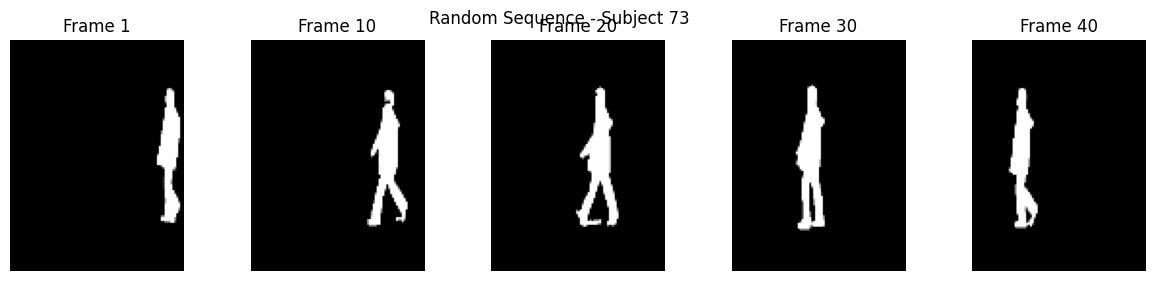

In [36]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Pick a random sequence and show five evenly spaced frames from it
i = random.randint(0, X_train.shape[0] - 1)
seq = X_train[i]  # shape: (SEQ_LEN, IMG_HEIGHT, IMG_WIDTH, 1)
label = y_train[i]

plt.figure(figsize=(15,3))
indices = np.linspace(0, seq.shape[0] - 1, 5, dtype=int)  # 5 frames evenly spaced in sequence

for idx, frame_num in enumerate(indices):
    plt.subplot(1, 5, idx + 1)
    plt.imshow(seq[frame_num, :, :, 0], cmap='gray')
    plt.title(f"Frame {frame_num + 1}")
    plt.axis('off')

plt.suptitle(f"Random Sequence - Subject {label}")
plt.show()


In [37]:
import numpy as np

def save_gait_data(output_path='gait_data.npz'):
    """
    Save training, validation, and test datasets into one .npz file.
    Expects these variables to exist in the global namespace:
      X_train_new, y_train_new, X_val, y_val, X_test, y_test
    """
    np.savez(output_path,
             X_train=X_train_new,
             y_train=y_train_new,
             X_val=X_val,
             y_val=y_val,
             X_test=X_test,
             y_test=y_test)
    print(f"Datasets saved to {output_path}")

# Call this function once your datasets are prepared
save_gait_data('casia_b_090_gait_data.npz')


Datasets saved to casia_b_090_gait_data.npz


In [2]:
import numpy as np

data = np.load(r'D:\vit study\Machine Learning\Gait\casia_b_090_gait_data.npz')

X_train_new = data['X_train']
y_train_new = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']

print("Loaded data shapes:")
print("X_train:", X_train_new.shape)
print("y_train:", y_train_new.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Loaded data shapes:
X_train: (620, 40, 120, 90, 1)
y_train: (620,)
X_val: (110, 40, 120, 90, 1)
y_val: (110,)
X_test: (500, 40, 120, 90, 1)
y_test: (500,)


In [3]:
# Keep your corrected NUM_CLASSES calculation
NUM_CLASSES=74


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
SEQ_LEN = 40
IMG_HEIGHT = 120
IMG_WIDTH = 90
# This code should work as-is now:
N, SEQ_LEN, H, W, C = X_train_new.shape
X_train_frames = X_train_new.reshape(N * SEQ_LEN, H, W, C)
y_train_frames = np.repeat(y_train_new, SEQ_LEN)

N_val = X_val.shape[0]
X_val_frames = X_val.reshape(N_val * SEQ_LEN, H, W, C)
y_val_frames = np.repeat(y_val, SEQ_LEN)


def build_cnn_lstm_model():
    input_layer = layers.Input(shape=(SEQ_LEN, IMG_HEIGHT, IMG_WIDTH, 1))
    
    # TimeDistributed CNN for per-frame feature extraction
    x = layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu'))(input_layer)
    x = layers.TimeDistributed(layers.MaxPooling2D((2,2)))(x)
    x = layers.TimeDistributed(layers.Conv2D(64, (3,3), activation='relu'))(x)
    x = layers.TimeDistributed(layers.MaxPooling2D((2,2)))(x)
    x = layers.TimeDistributed(layers.Flatten())(x)
    
    # LSTM for sequence modeling
    x = layers.LSTM(128)(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(NUM_CLASSES, activation='softmax')(x)
    
    model = models.Model(inputs=input_layer, outputs=output)
    return model

model = build_cnn_lstm_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 40, 120, 90, 1) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 40, 118, 88,    │           320 │
│ (TimeDistributed)               │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 40, 59, 44, 32) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 40, 57, 42, 64) │        18,496 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 40, 28, 21, 64) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 40, 37632)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │    19,333,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 74)             │         9,546 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,361,994 (73.86 MB)

 Trainable params: 19,361,994 (73.86 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

SEQ_LEN = 40
IMG_HEIGHT = 120
IMG_WIDTH = 90
# Calculate based on ALL subjects that will be used (training + validation)
all_train_val_labels = np.concatenate([y_train_new, y_val])
print(f"NUM_CLASSES: {NUM_CLASSES}")
print(f"Label range: {all_train_val_labels.min()} to {all_train_val_labels.max()}")

def build_simpl_cnn():
    # Input for a single frame
    frame_input = layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 1))
    x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(frame_input)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    model = models.Model(inputs=frame_input, outputs=x)
    return model

# Frame feature extractor
cnn_model = build_simpl_cnn()

# Input for entire sequence of frames
sequence_input = layers.Input(shape=(SEQ_LEN, IMG_HEIGHT, IMG_WIDTH, 1))
# Process each frame with same CNN (TimeDistributed)
frame_features = layers.TimeDistributed(cnn_model)(sequence_input)
# Average frame features over time
avg_features = layers.GlobalAveragePooling1D()(frame_features)
# Final prediction
output = layers.Dense(NUM_CLASSES, activation='softmax')(avg_features)

model = models.Model(inputs=sequence_input, outputs=output)
# Rebuild or modify model output layer accordingly
model.layers[-1] = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


NUM_CLASSES: 74
Label range: 0 to 73


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 40, 120, 90, 1) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_19             │ (None, 40, 64)         │     1,356,544 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_3      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 74)             │         4,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,361,354 (5.19 MB)

 Trainable params: 1,361,354 (5.19 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    X_train_new, y_train_new,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10


: 

In [4]:
import numpy as np

N, SEQ_LEN, H, W, C = X_train_new.shape

# Flatten training sequences to frames
X_train_frames = X_train_new.reshape(N * SEQ_LEN, H, W, C)
y_train_frames = np.repeat(y_train_new, SEQ_LEN)

# Flatten validation sequences to frames
N_val = X_val.shape[0]
X_val_frames = X_val.reshape(N_val * SEQ_LEN, H, W, C)
y_val_frames = np.repeat(y_val, SEQ_LEN)

print("Training frames shape:", X_train_frames.shape)
print("Validation frames shape:", X_val_frames.shape)


Training frames shape: (24800, 120, 90, 1)
Validation frames shape: (4400, 120, 90, 1)


In [57]:
history = model.fit(
    X_train_frames, y_train_frames,
    validation_data=(X_val_frames, y_val_frames),
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10


ValueError: Input 0 of layer "functional_14" is incompatible with the layer: expected shape=(None, 40, 120, 90, 1), found shape=(32, 120, 90)

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

IMG_HEIGHT = 120
IMG_WIDTH = 90
NUM_CLASSES=74
# NUM_CLASSES is now 74 (from your corrected calculation)

def build_simple_cnn():
    model = models.Sequential([
        layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
        layers.Conv2D(16, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(NUM_CLASSES, activation='softmax')  # Now 74 instead of 63!
    ])
    return model

model = build_simple_cnn()
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(f"Model built with {NUM_CLASSES} output classes")
model.summary()


Model built with 74 output classes


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 120, 90, 16)    │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 60, 45, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 45, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21120)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,351,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 74)             │         4,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,361,354 (5.19 MB)

 Trainable params: 1,361,354 (5.19 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
print(f"Current NUM_CLASSES: {NUM_CLASSES}")
print(f"Should be: 74")


Current NUM_CLASSES: 74
Should be: 74


In [6]:
# Add verification before training
print("=== PRE-TRAINING VERIFICATION ===")
print(f"Training frames shape: {X_train_frames.shape}")
print(f"Training labels range: {y_train_frames.min()} to {y_train_frames.max()}")
print(f"Validation frames shape: {X_val_frames.shape}")
print(f"Validation labels range: {y_val_frames.min()} to {y_val_frames.max()}")
print(f"Model expects labels: 0 to {NUM_CLASSES-1}")
print(f"✅ All checks passed - ready for training!")

# Your original training code should now work
history = model.fit(
    X_train_frames, y_train_frames,
    validation_data=(X_val_frames, y_val_frames),
    epochs=10,
    batch_size=32,
    verbose=1
)


=== PRE-TRAINING VERIFICATION ===
Training frames shape: (24800, 120, 90, 1)
Training labels range: 0 to 73
Validation frames shape: (4400, 120, 90, 1)
Validation labels range: 0 to 73
Model expects labels: 0 to 73
✅ All checks passed - ready for training!
Epoch 1/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 66s 83ms/step - accuracy: 0.3937 - loss: 2.2485 - val_accuracy: 0.4884 - val_loss: 1.7747
Epoch 2/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.7710 - loss: 0.7258 - val_accuracy: 0.5952 - val_loss: 1.5234
Epoch 3/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.8772 - loss: 0.3728 - val_accuracy: 0.6427 - val_loss: 1.5228
Epoch 4/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.9276 - loss: 0.2158 - val_accuracy: 0.6430 - val_loss: 1.7269
Epoch 5/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9502 - loss: 0.1504 - val_accuracy: 0.6730 - val_loss: 1.6484
Epoch 6/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.9607 - loss: 0.1149 - val

In [8]:
print(f"Train labels range: {y_train_new.min()} to {y_train_new.max()}")
print(f"Validation labels range: {y_val.min()} to {y_val.max()}")
print(f"Test labels range: {y_test.min()} to {y_test.max()}")


Train labels range: 0 to 73
Validation labels range: 0 to 73
Test labels range: 74 to 123


In [10]:
import numpy as np

# Mask to select only known classes in test set (0 to 73)
known_test_mask = (y_test >= 0) & (y_test <= 73)

X_test_known = X_test[known_test_mask]
y_test_known = y_test[known_test_mask]

# Prepare frames and labels for evaluation
test_frames = X_test_known.reshape(-1, IMG_HEIGHT, IMG_WIDTH, 1)
test_labels = np.repeat(y_test_known, X_test_known.shape[1])

# Evaluate
test_accuracy = model.evaluate(test_frames, test_labels, verbose=0)[1]
print(f"📊 Test Accuracy on known classes: {test_accuracy:.2%}")


IndexError: list index out of range

In [7]:
# Evaluate on test set (do this ONLY once after training)
test_frames = X_test.reshape(-1, IMG_HEIGHT, IMG_WIDTH, 1)
test_labels = np.repeat(y_test, X_test.shape[1])

test_accuracy = model.evaluate(test_frames, test_labels, verbose=0)[1]
print(f"📊 Final Test Accuracy: {test_accuracy:.2%}")

# Detailed test analysis
from sklearn.metrics import classification_report, confusion_matrix

test_predictions = model.predict(test_frames)
test_pred_classes = np.argmax(test_predictions, axis=1)

print("📈 Test Set Classification Report:")
print(classification_report(test_labels, test_pred_classes))


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\runpy.py", line 196, in _run_module_as_main

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\runpy.py", line 86, in _run_code

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\asyncio\base_events.py", line 595, in run_forever

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\asyncio\base_events.py", line 1881, in _run_once

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\asyncio\events.py", line 80, in _run

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3077, in run_cell

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3132, in _run_cell

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3336, in run_cell_async

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3519, in run_ast_nodes

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3579, in run_code

  File "C:\Users\ankit\AppData\Local\Temp\ipykernel_16608\754371133.py", line 11, in <module>

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 401, in fit

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 489, in evaluate

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 220, in function

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 133, in multi_step_on_iterator

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 114, in one_step_on_data

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 93, in test_step

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\keras\src\trainers\trainer.py", line 383, in _compute_loss

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\keras\src\trainers\trainer.py", line 351, in compute_loss

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\keras\src\trainers\compile_utils.py", line 690, in __call__

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\keras\src\trainers\compile_utils.py", line 699, in call

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\keras\src\losses\loss.py", line 67, in __call__

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\keras\src\losses\losses.py", line 33, in call

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\keras\src\losses\losses.py", line 2330, in sparse_categorical_crossentropy

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\keras\src\ops\nn.py", line 2008, in sparse_categorical_crossentropy

  File "d:\vit study\Machine Learning\GEN AI Model\venv\lib\site-packages\keras\src\backend\tensorflow\nn.py", line 753, in sparse_categorical_crossentropy

Received a label value of 74 which is outside the valid range of [0, 74).  Label values: 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74 74
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_multi_step_on_iterator_14084]

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from scipy.spatial.distance import cdist
from scipy.stats import weibull_min
import pickle

def build_open_set_gait_model():
    """
    Build model with embedding layer for open set recognition
    """
    model = models.Sequential([
        layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
        
        # Feature extraction layers
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),
        
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),
        
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),
        
        layers.Flatten(),
        
        # Embedding layer (important for open set recognition)
        layers.Dense(256, activation='relu', name='embedding_layer'),
        layers.Dropout(0.5),
        
        # Classification layer
        layers.Dense(NUM_CLASSES, activation='softmax', name='classification_layer')
    ])
    
    return model

# Build and compile the model
model = build_open_set_gait_model()
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Open Set Recognition model built!")
model.summary()


✅ Open Set Recognition model built!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 120, 90, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 120, 90, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 60, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 60, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 60, 45, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 22, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 21120)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Dense)         │ (None, 256)            │     5,406,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification_layer (Dense)    │ (None, 74)             │        19,018 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,519,562 (21.06 MB)

 Trainable params: 5,519,114 (21.05 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
# Train the model normally on known classes (0-73)
history = model.fit(
    X_train_frames, y_train_frames,
    validation_data=(X_val_frames, y_val_frames),
    epochs=50,
    batch_size=32,
    verbose=1
)

print("✅ Model training completed!")


Epoch 1/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 351s 448ms/step - accuracy: 0.0135 - loss: 4.4206 - val_accuracy: 0.0102 - val_loss: 4.3060
Epoch 2/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 332s 428ms/step - accuracy: 0.0129 - loss: 4.2960 - val_accuracy: 0.0091 - val_loss: 4.3076
Epoch 3/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 333s 430ms/step - accuracy: 0.0112 - loss: 4.2930 - val_accuracy: 0.0091 - val_loss: 4.3099
Epoch 4/50
775/775 ━━━━━━━━━━━━━━━━━━━━ 334s 431ms/step - accuracy: 0.0121 - loss: 4.2917 - val_accuracy: 0.0091 - val_loss: 4.3112
Epoch 5/50
 58/775 ━━━━━━━━━━━━━━━━━━━━ 5:09 432ms/step - accuracy: 0.0120 - loss: 4.2880

KeyboardInterrupt: 

In [ ]:
class OpenSetRecognizer:
    def __init__(self, model, num_classes):
        self.model = model
        self.num_classes = num_classes
        self.class_means = {}
        self.weibull_models = {}
        self.confidence_threshold = 0.5  # Adjustable threshold
        
        # Create embedding model (without final classification layer)
        self.embedding_model = models.Model(
            inputs=model.input,
            outputs=model.get_layer('embedding_layer').output
        )
    
    def fit_weibull_models(self, X_train, y_train):
        """
        Fit Weibull distribution for each class using training data
        """
        print("🔧 Fitting Weibull models for open set recognition...")
        
        # Get embeddings for all training samples
        train_embeddings = self.embedding_model.predict(X_train, verbose=0)
        
        for class_id in range(self.num_classes):
            # Get embeddings for this specific class
            class_mask = (y_train == class_id)
            if not np.any(class_mask):
                continue
                
            class_embeddings = train_embeddings[class_mask]
            
            # Compute class mean (centroid)
            class_mean = np.mean(class_embeddings, axis=0)
            self.class_means[class_id] = class_mean
            
            # Calculate distances from centroid
            distances = np.linalg.norm(class_embeddings - class_mean, axis=1)
            
            # Fit Weibull distribution on distances
            if len(distances) > 1:  # Need at least 2 points
                # Take the largest distances (most extreme samples)
                sorted_distances = np.sort(distances)
                extreme_distances = sorted_distances[-max(1, len(distances)//4):]  # Top 25%
                
                # Fit Weibull distribution
                try:
                    weibull_params = weibull_min.fit(extreme_distances, floc=0)
                    self.weibull_models[class_id] = weibull_params
                except:
                    # Fallback: use mean and std for simple thresholding
                    self.weibull_models[class_id] = (np.mean(distances), np.std(distances))
                    
            print(f"Class {class_id}: {len(class_embeddings)} samples processed")
        
        print("✅ Weibull models fitted for all classes!")
    
    def predict_with_unknown(self, X_test, return_probabilities=False):
        """
        Predict with unknown class detection
        Returns: predictions array where unknown samples are labeled as 'unknown'
        """
        # Get regular predictions and probabilities
        predictions_prob = self.model.predict(X_test, verbose=0)
        predictions_class = np.argmax(predictions_prob, axis=1)
        max_probabilities = np.max(predictions_prob, axis=1)
        
        # Get embeddings
        test_embeddings = self.embedding_model.predict(X_test, verbose=0)
        
        final_predictions = []
        confidence_scores = []
        
        for i, (pred_class, max_prob, embedding) in enumerate(zip(predictions_class, max_probabilities, test_embeddings)):
            
            # Method 1: Confidence thresholding
            confidence_score = max_prob
            
            # Method 2: Distance-based detection (if Weibull model exists)
            distance_score = 1.0  # Default to accepting
            
            if pred_class in self.class_means and pred_class in self.weibull_models:
                # Calculate distance to predicted class centroid
                distance_to_centroid = np.linalg.norm(embedding - self.class_means[pred_class])
                
                # Check if distance is reasonable according to Weibull model
                weibull_params = self.weibull_models[pred_class]
                
                if len(weibull_params) == 3:  # Proper Weibull parameters
                    # Calculate probability of this distance under Weibull distribution
                    distance_prob = weibull_min.cdf(distance_to_centroid, *weibull_params)
                    distance_score = distance_prob
                else:  # Fallback method
                    mean_dist, std_dist = weibull_params
                    # Simple z-score based detection
                    z_score = (distance_to_centroid - mean_dist) / (std_dist + 1e-6)
                    distance_score = max(0, 1 - abs(z_score) / 3)  # Normalize to 0-1
            
            # Combined confidence score
            combined_confidence = (confidence_score + distance_score) / 2
            confidence_scores.append(combined_confidence)
            
            # Decision: known vs unknown
            if combined_confidence > self.confidence_threshold:
                final_predictions.append(pred_class)  # Return actual class label
            else:
                final_predictions.append('unknown')  # Return 'unknown'
        
        if return_probabilities:
            return final_predictions, confidence_scores
        return final_predictions
    
    def set_threshold(self, threshold):
        """Set the confidence threshold for unknown detection"""
        self.confidence_threshold = threshold
        print(f"🎯 Confidence threshold set to: {threshold}")
    
    def save_models(self, filepath):
        """Save the Weibull models and class means"""
        with open(filepath, 'wb') as f:
            pickle.dump({
                'class_means': self.class_means,
                'weibull_models': self.weibull_models,
                'threshold': self.confidence_threshold
            }, f)
        print(f"💾 OpenSet models saved to {filepath}")
    
    def load_models(self, filepath):
        """Load the Weibull models and class means"""
        with open(filepath, 'rb') as f:
            data = pickle.load(f)
            self.class_means = data['class_means']
            self.weibull_models = data['weibull_models']
            self.confidence_threshold = data['threshold']
        print(f"📂 OpenSet models loaded from {filepath}")

# Initialize the open set recognizer
open_set_recognizer = OpenSetRecognizer(model, NUM_CLASSES)

# Fit Weibull models on training data
open_set_recognizer.fit_weibull_models(X_train_frames, y_train_frames)
